> Data Understanding

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_csv('Sales Data.csv')
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,12/30/2019 0:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,12/29/2019 7:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,12/12/2019 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,12/22/2019 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,12/18/2019 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [52]:
df.tail()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
185945,13617,222905,AAA Batteries (4-pack),1,2.99,6/7/2019 19:02,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,13618,222906,27in FHD Monitor,1,149.99,6/1/2019 19:29,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,13619,222907,USB-C Charging Cable,1,11.95,6/22/2019 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,13620,222908,USB-C Charging Cable,1,11.95,6/26/2019 18:35,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18
185949,13621,222909,AAA Batteries (4-pack),1,2.99,6/25/2019 14:33,"209 11th St, Atlanta, GA 30301",6,2.99,Atlanta,14


In [53]:
df.shape

(185950, 11)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [55]:
df_clear = df.copy()
df_clear['Order Date'] = pd.to_datetime(df_clear['Order Date'])
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Unnamed: 0        185950 non-null  int64         
 1   Order ID          185950 non-null  int64         
 2   Product           185950 non-null  object        
 3   Quantity Ordered  185950 non-null  int64         
 4   Price Each        185950 non-null  float64       
 5   Order Date        185950 non-null  datetime64[ns]
 6   Purchase Address  185950 non-null  object        
 7   Month             185950 non-null  int64         
 8   Sales             185950 non-null  float64       
 9   City              185950 non-null  object        
 10  Hour              185950 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 15.6+ MB


> Data Cleaning

In [56]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,12/30/2019 0:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,12/29/2019 7:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,12/12/2019 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,12/22/2019 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,12/18/2019 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [57]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

In [58]:
df.shape

(185950, 10)

In [59]:
for col_name in ['Purchase Address','City']:
    print(df_clear[col_name].value_counts(),'\n')
    print(df.shape)

Purchase Address
193 Forest St, San Francisco, CA 94016      9
279 Sunset St, San Francisco, CA 94016      8
223 Elm St, Los Angeles, CA 90001           8
662 Chestnut St, San Francisco, CA 94016    7
716 5th St, San Francisco, CA 94016         7
                                           ..
606 Pine St, Portland, OR 97035             1
408 Hickory St, San Francisco, CA 94016     1
464 Ridge St, Boston, MA 02215              1
697 Forest St, Dallas, TX 75001             1
18 Maple St, Boston, MA 02215               1
Name: count, Length: 140787, dtype: int64 

(185950, 10)
City
San Francisco    44732
Los Angeles      29605
New York City    24876
Boston           19934
Atlanta          14881
Dallas           14820
Seattle          14732
Portland         12465
Austin            9905
Name: count, dtype: int64 

(185950, 10)


In [60]:
df_clear.duplicated().sum()

np.int64(0)

In [61]:
df_clear.isnull().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

> Analysis and Visualizations

In [62]:
unique_products = df['Product'].unique()
print(unique_products)

['Macbook Pro Laptop' 'LG Washing Machine' 'USB-C Charging Cable'
 '27in FHD Monitor' 'AA Batteries (4-pack)' 'Bose SoundSport Headphones'
 'AAA Batteries (4-pack)' 'ThinkPad Laptop' 'Lightning Charging Cable'
 'Google Phone' 'Wired Headphones' 'Apple Airpods Headphones'
 'Vareebadd Phone' 'iPhone' '20in Monitor' '34in Ultrawide Monitor'
 'Flatscreen TV' '27in 4K Gaming Monitor' 'LG Dryer']


In [63]:
unique_products = df['City'].unique()
print(unique_products)

[' New York City' ' San Francisco' ' Atlanta' ' Portland' ' Dallas'
 ' Los Angeles' ' Boston' ' Austin' ' Seattle']


In [64]:
jumlah_produk = df['Product'].nunique()
jumlah_produk


19

In [65]:
pd.DataFrame(df['Quantity Ordered'].describe())

,Quantity Ordered
count,185950.000000
mean,1.124383
std,0.442793
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,9.000000


In [66]:
df = pd.read_csv('Sales Data.csv')

# Tentukan negara asal pelanggan
customer_countries = df[['Order ID', 'City']].drop_duplicates()

# Hitung berapa kali setiap pelanggan melakukan pembelian
customer_order_counts = df['Order ID'].value_counts()

# 10 pelanggan teratas berdasarkan frekuensi pembelian
top_customers = customer_order_counts.head(10)

# Gabungkan data negara dengan pelanggan teratas
top_customers_info = pd.merge(top_customers, customer_countries, left_index=True, right_on='Order ID')

print("Top 10 Pelanggan Berdasarkan Frekuensi Pembelian:")
print(top_customers_info)

Top 10 Pelanggan Berdasarkan Frekuensi Pembelian:
       count  Order ID            City
54069      5    160873   San Francisco
85018      4    196615   San Francisco
26661      4    178158   San Francisco
9536       4    304802     Los Angeles
76926      4    242936          Austin
59085      4    165665     Los Angeles
82541      4    194253          Austin
17491      4    312462   San Francisco
42662      4    193511          Austin
17429      4    312407         Seattle


##Time - Series Number of Orders##

In [67]:
df['Month'] = pd.to_datetime(df['Order Date']).dt.month
df['Month']
transactions_per_month = df.groupby('Month').size()
transactions_per_month = df['Month'].value_counts().sort_index()
transactions_per_month

Month
1      9709
2     11975
3     15153
4     18279
5     16566
6     13554
7     14293
8     11961
9     11621
10    20282
11    17573
12    24984
Name: count, dtype: int64

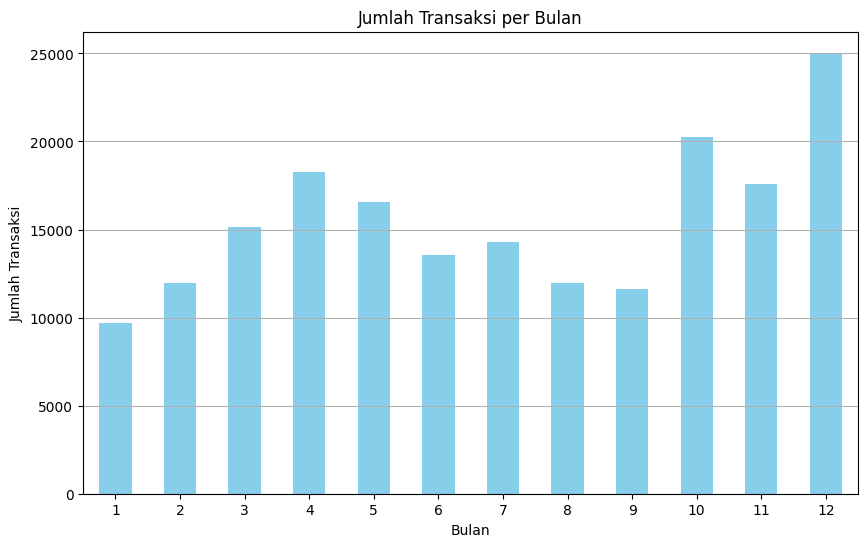

In [68]:
# Plot jumlah transaksi per bulan
plt.figure(figsize=(10, 6))
transactions_per_month.plot(kind='bar', color='skyblue')
plt.title('Jumlah Transaksi per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


In [69]:
total_sales_per_product = df.groupby('Product')['Sales'].sum().reset_index()
total_sales_per_product
total_sales_per_product_sorted = total_sales_per_product.sort_values(by='Sales', ascending=False)
total_sales_per_product_sorted

,Product,Sales
13,Macbook Pro Laptop,8037600.00
18,iPhone,4794300.00
14,ThinkPad Laptop,4129958.70
9,Google Phone,3319200.00
1,27in 4K Gaming Monitor,2435097.56
3,34in Ultrawide Monitor,2355558.01
6,Apple Airpods Headphones,2349150.00
8,Flatscreen TV,1445700.00
7,Bose SoundSport Headphones,1345565.43
2,27in FHD Monitor,1132424.50


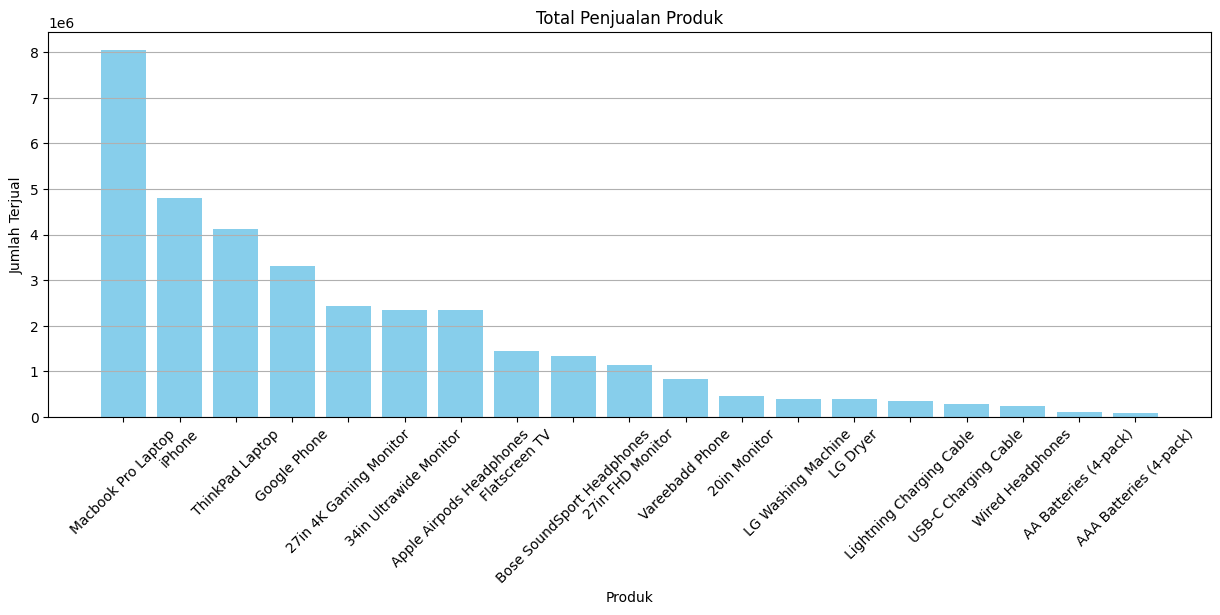

In [70]:
total_sales_per_product = total_sales_per_product.sort_values(by='Sales', ascending=False)

# Plot bar chart
plt.figure(figsize=(15, 5))
plt.bar(total_sales_per_product['Product'], total_sales_per_product['Sales'], color='skyblue')
plt.title('Total Penjualan Produk')
plt.xlabel('Produk')
plt.ylabel('Jumlah Terjual')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [71]:
df = pd.read_csv('Sales Data.csv')
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Filter data untuk rentang waktu yang diinginkan (Januari 2019 sampai Januari 2020)
start_date = '2019-01-01'
end_date = '2020-01-31'
df_filtered = df[(df['Order Date'] >= start_date) & (df['Order Date'] <= end_date)]

# Ubah kolom 'Order Date' menjadi periode bulan dan tahun saja
df_filtered['Bulan'] = df_filtered['Order Date'].dt.to_period('M')

# Hitung jumlah transaksi per bulan
transactions_per_month = df_filtered.groupby('Bulan').size().reset_index(name='Jumlah Transaksi')

# Ubah 'Bulan' dari Period ke Tanggal (ambil tanggal pertama setiap bulan)
transactions_per_month['Bulan'] = transactions_per_month['Bulan'].apply(lambda x: x.start_time)
transactions_per_month

,Bulan,Jumlah Transaksi
0,2019-01-01,9675
1,2019-02-01,11975
2,2019-03-01,15153
3,2019-04-01,18279
4,2019-05-01,16566
5,2019-06-01,13554
6,2019-07-01,14293
7,2019-08-01,11961
8,2019-09-01,11621
9,2019-10-01,20282


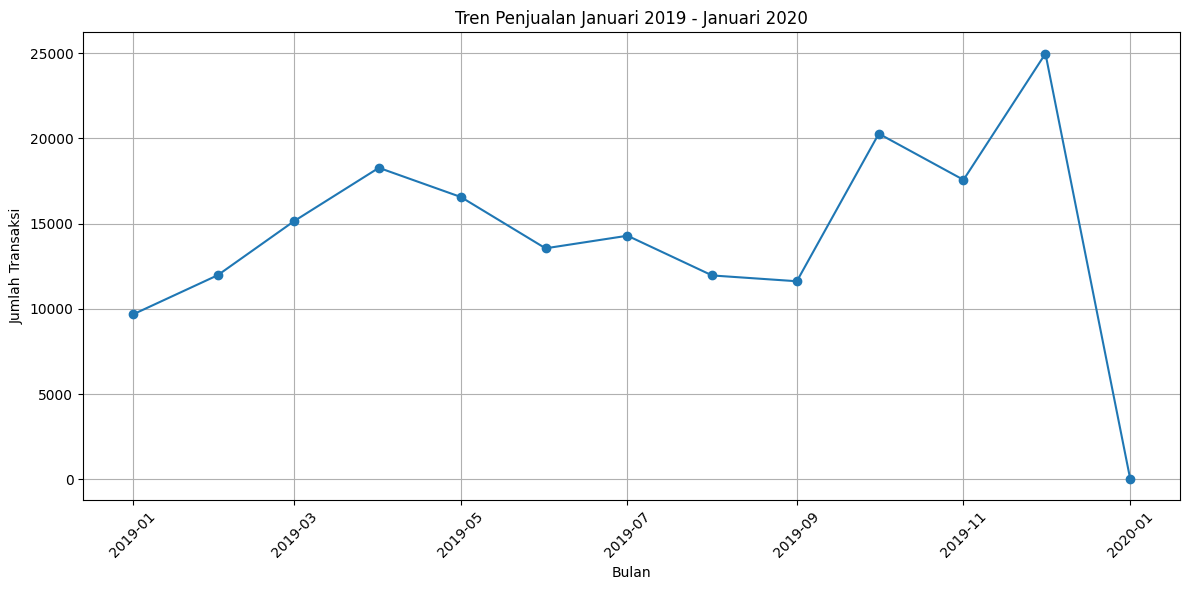

In [72]:
# Filter data untuk rentang waktu yang diinginkan (Januari 2019 sampai Januari 2020)
start_date = '2019-01-01'
end_date = '2020-01-31'
df_filtered = df[(df['Order Date'] >= start_date) & (df['Order Date'] <= end_date)]

# Ubah kolom 'Order Date' menjadi periode bulan dan tahun saja
df_filtered['Bulan'] = df_filtered['Order Date'].dt.to_period('M')

# Hitung jumlah transaksi per bulan
transactions_per_month = df_filtered.groupby('Bulan').size().reset_index(name='Jumlah Transaksi')

# Ubah 'Bulan' dari Period ke Tanggal (ambil tanggal pertama setiap bulan)
transactions_per_month['Bulan'] = transactions_per_month['Bulan'].apply(lambda x: x.start_time)

# Plot tren penjualan
plt.figure(figsize=(12, 6))
plt.plot(transactions_per_month['Bulan'], transactions_per_month['Jumlah Transaksi'], marker='o', linestyle='-')
plt.title('Tren Penjualan Januari 2019 - Januari 2020')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [81]:
# Groupby berdasarkan kota dan hitung total penjualan per kota
city_sales = df_clear.groupby('City')['Sales'].sum().reset_index()

# Urutkan berdasarkan total penjualan dari yang terbesar ke terkecil
city_sales = city_sales.sort_values(by='Sales', ascending=False)
city_sales

,City,Sales
7,San Francisco,8262203.91
4,Los Angeles,5452570.80
5,New York City,4664317.43
2,Boston,3661642.01
0,Atlanta,2795498.58
3,Dallas,2767975.40
8,Seattle,2747755.48
6,Portland,2320490.61
1,Austin,1819581.75


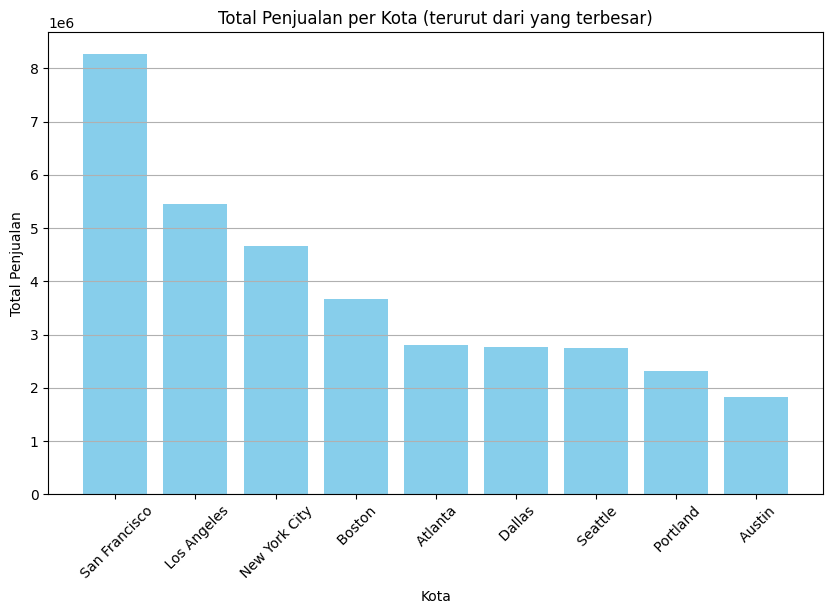

In [74]:
# Visualisasi total penjualan per kota
plt.figure(figsize=(10, 6))
plt.bar(city_sales['City'], city_sales['Sales'], color='skyblue')
plt.title('Total Penjualan per Kota (terurut dari yang terbesar)')
plt.xlabel('Kota')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [80]:
# Groupby berdasarkan jam dan hitung jumlah pembelian
hourly_sales = df_clear.groupby('Hour').size().reset_index(name='Sales')
hourly_sales

,Hour,Sales
0,0,3910
1,1,2350
2,2,1243
3,3,831
4,4,854
5,5,1321
6,6,2482
7,7,4011
8,8,6256
9,9,8748


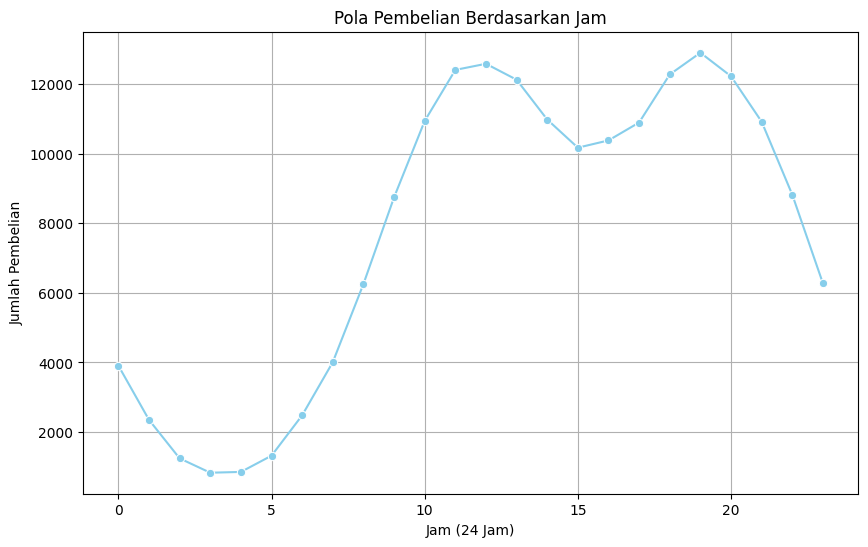

In [76]:
# Plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Hour', y='Sales', data=hourly_sales, marker='o', color='skyblue')
plt.title('Pola Pembelian Berdasarkan Jam')
plt.xlabel('Jam (24 Jam)')
plt.ylabel('Jumlah Pembelian')
plt.grid(True)
plt.show()

In [77]:
from itertools import combinations
from collections import Counter

df_clear['Grouped'] = df_clear.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
product_purchased_together = df_clear[['Order ID','Grouped']].drop_duplicates()
product_purchased_together

count= Counter()
for row in product_purchased_together['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


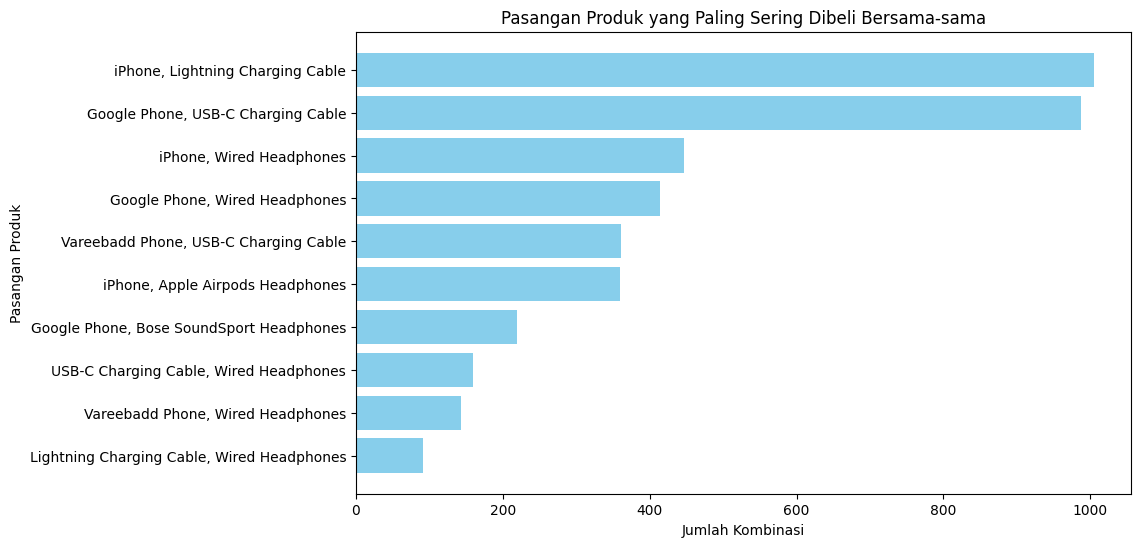

In [78]:
# Mengambil 10 kombinasi yang paling sering dibeli bersama-sama
most_common = count.most_common(10)
# Memisahkan data untuk plotting
pairs = [', '.join(key) for key, _ in most_common]
counts = [count for _, count in most_common]

# Membuat visualisasi dengan matplotlib
plt.figure(figsize=(10, 6))
plt.barh(pairs, counts, color='skyblue')
plt.xlabel('Jumlah Kombinasi')
plt.ylabel('Pasangan Produk')
plt.title('Pasangan Produk yang Paling Sering Dibeli Bersama-sama')
plt.gca().invert_yaxis()  # Memutar urutan agar yang paling banyak di atas
plt.show()

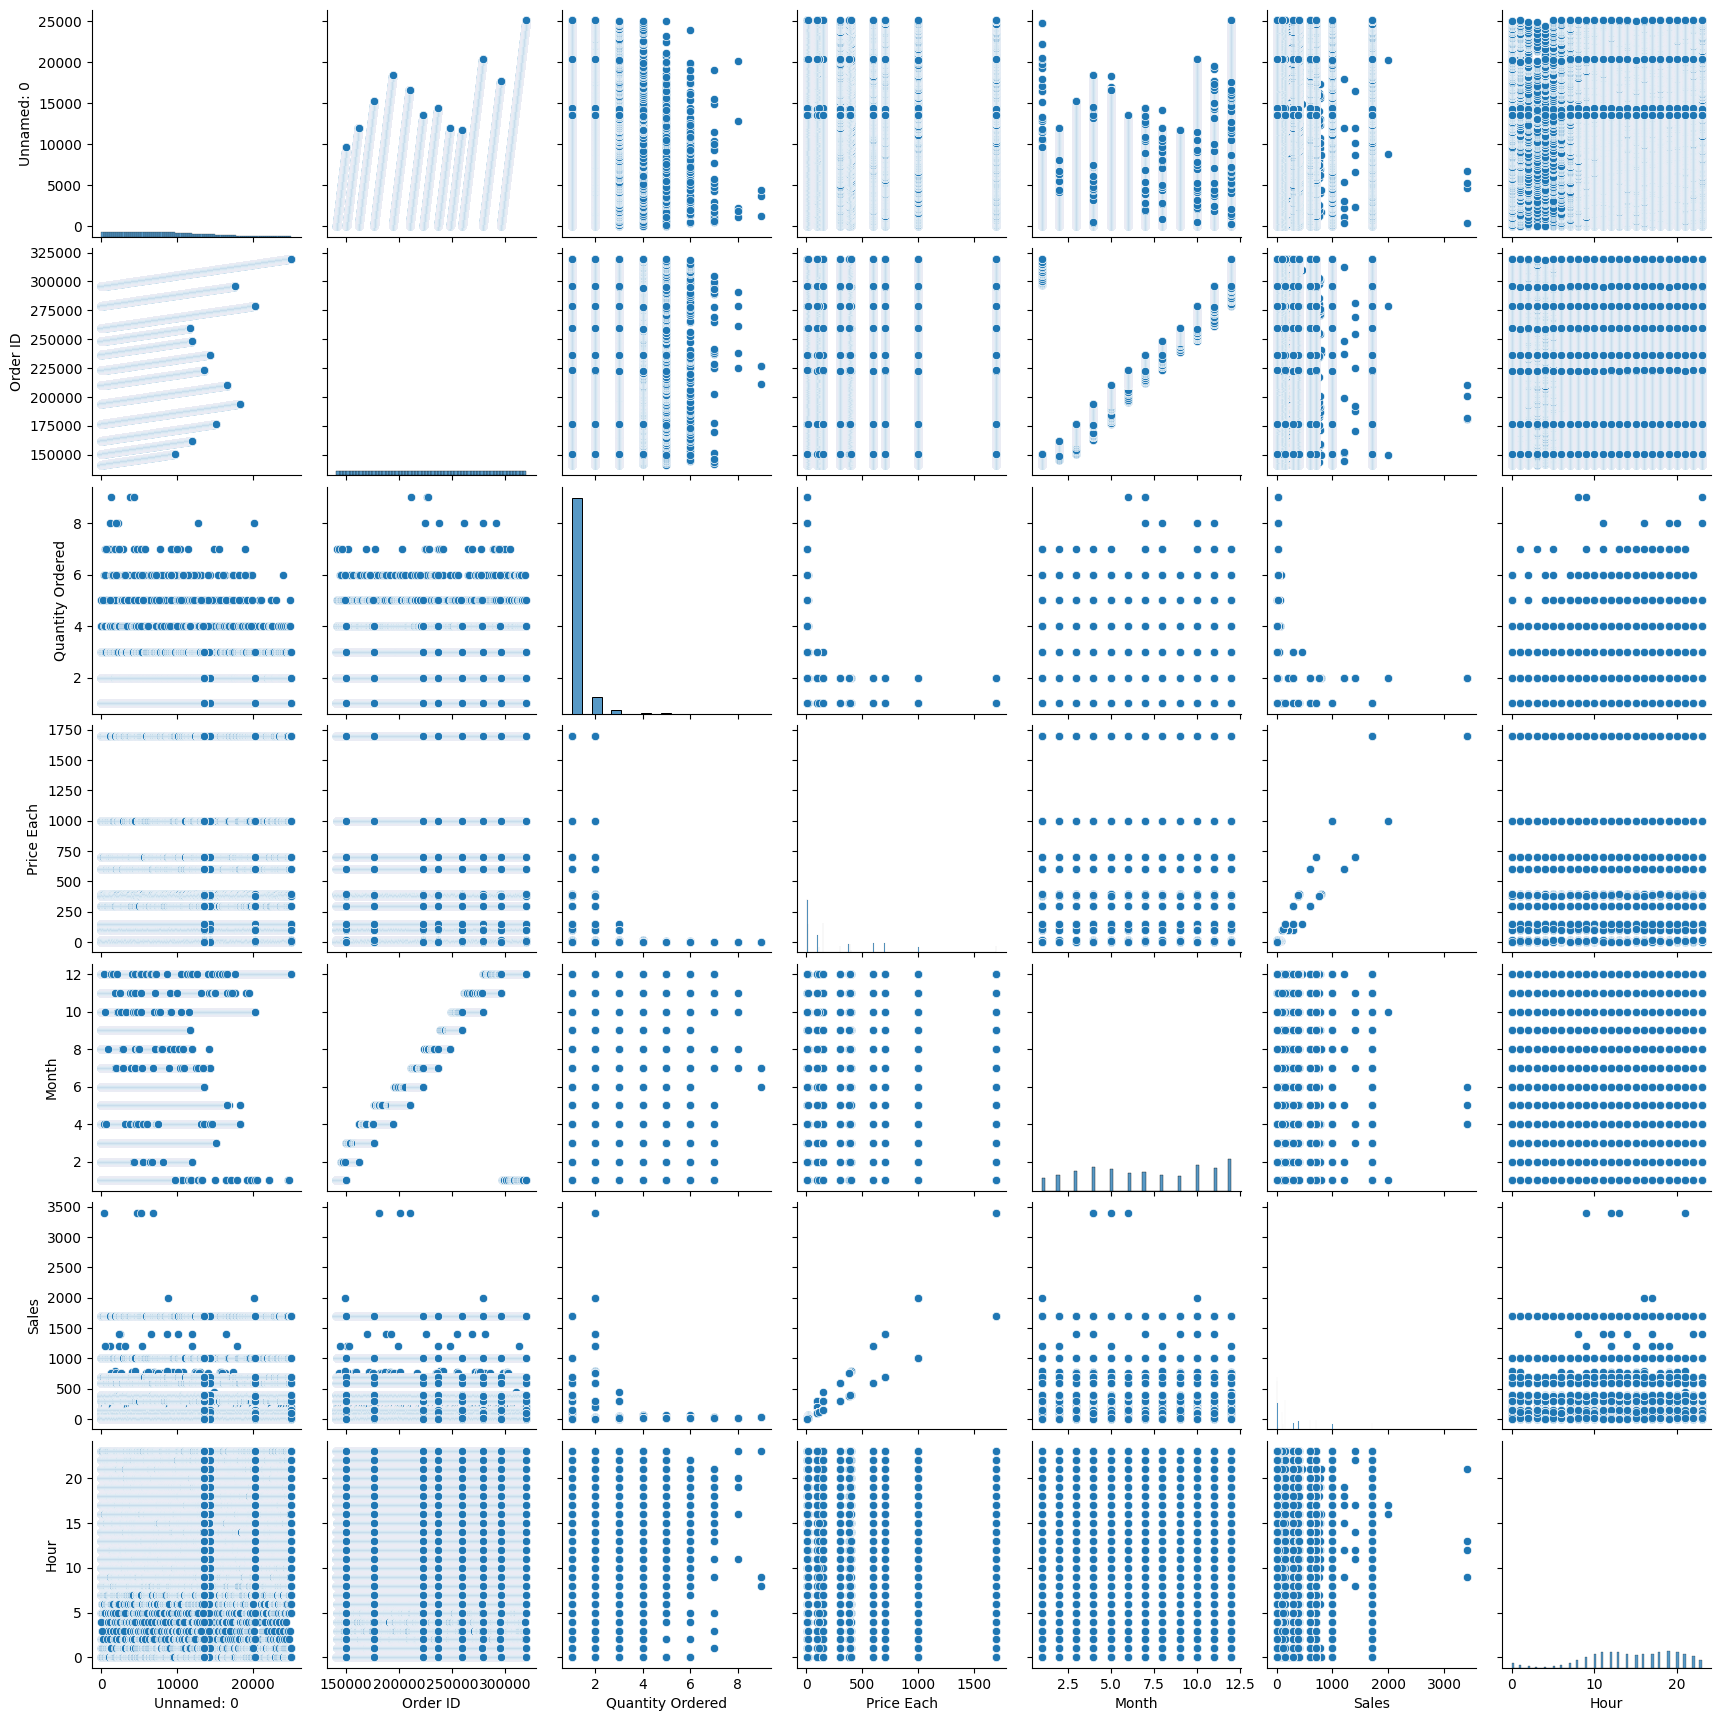

In [79]:
sns.pairplot(df)
plt.show()